<a href="https://colab.research.google.com/github/moisesmember/srag-covid-19/blob/main/SRAG_COVID_19_AM_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>TÍTULO: CASOS DE INTERNAÇÃO EM UTI NO AMAZONAS POR SINDROME RESPIRATÓRIA AGUDA GRAVE POR COVID-19</strong>
</br>
<strong>Fonte de dados disponível no link:</strong> <a href="https://drive.google.com/drive/folders/1Xqy813sSuIlcVlaJTLY_crgFACxYfNMX?usp=sharing">Clique aqui</a>
</br>
<strong>ALUNO: Moisés Felipe dos Santos</strong>
</br>
<strong>Machine Learning</strong>

In [ ]:
!pip install scikit-plot
!pip install Orange3

In [ ]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import Orange

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import tree

sns.set_theme(style="darkgrid") # Eu configuro os gráficos para exibirem em GRID cinza
drive.mount('/content/drive')

Mounted at /content/drive


#I - Carregamento de Dados

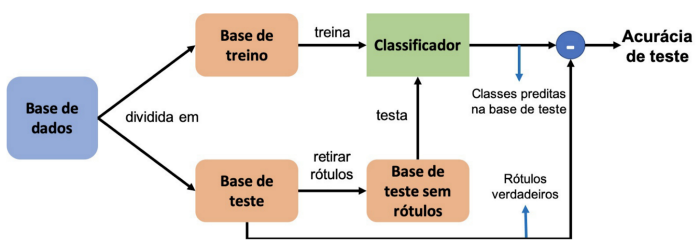

In [ ]:
with open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/I - DADOS_PROCESSADOS/srag_train_test_balance.pkl','rb') as f:
	X_srag_treinamento_balance, X_srag_teste_balance, y_srag_treinamento_balance, y_srag_teste_balance = pickle.load(f)

In [ ]:
X_srag_treinamento_balance.shape, y_srag_treinamento_balance.shape

((33422, 16), (33422,))

In [ ]:
X_srag_teste_balance.shape, y_srag_teste_balance.shape

((5898, 16), (5898,))

In [ ]:
y_srag_treinamento_balance, y_srag_teste_balance

(array(['NAO', 'SIM', 'SIM', ..., 'SIM', 'SIM', 'SIM'], dtype=object),
 array(['NAO', 'NAO', 'SIM', ..., 'SIM', 'SIM', 'SIM'], dtype=object))

In [ ]:
X_srag = np.concatenate((X_srag_treinamento_balance, X_srag_teste_balance), axis = 0) # Concatena os previsores por linha
y_srag = np.concatenate((y_srag_treinamento_balance, y_srag_teste_balance), axis = 0) # Concatena as classes por linha

#II - Matriz de Confusão dos Classificadores

##2.1 - Classificação com Naives Bayes

              precision    recall  f1-score   support

         NAO       0.81      0.03      0.06      2949
         SIM       0.51      0.99      0.67      2949

    accuracy                           0.51      5898
   macro avg       0.66      0.51      0.37      5898
weighted avg       0.66      0.51      0.37      5898

[[  95   22]
 [2854 2927]]


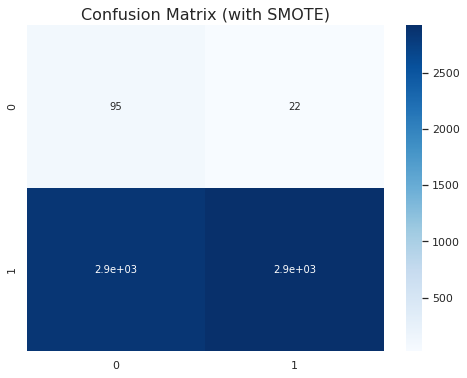

In [ ]:
modeloGaussian = GaussianNB() # biblioteca SKLEARN
modeloGaussian.fit(X_srag_treinamento_balance, y_srag_treinamento_balance) # Treinamento (geração de tabela de probabilidade)
previsoesGaussian = modeloGaussian.predict(X_srag_teste_balance) # Realizo as previsoes
print(classification_report(y_srag_teste_balance, previsoesGaussian)) # biblioteca SKLEARN
# gera matriz de confusão
cmGaussian = confusion_matrix(previsoesGaussian, y_srag_teste_balance, labels=["NAO","SIM"])
print(cmGaussian)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmGaussian, annot=True, cmap='Blues');

##2.2 - Classificação com Random Forest

              precision    recall  f1-score   support

         NAO       0.65      0.59      0.62      2949
         SIM       0.63      0.68      0.65      2949

    accuracy                           0.64      5898
   macro avg       0.64      0.64      0.64      5898
weighted avg       0.64      0.64      0.64      5898

[[1751 1198]
 [ 930 2019]]


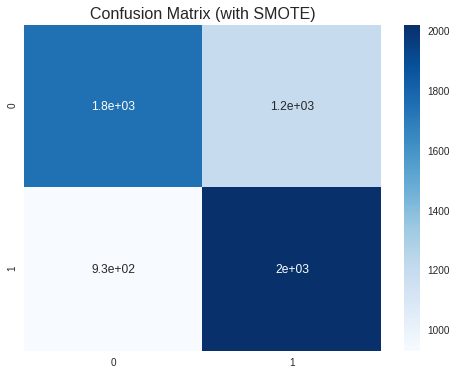

In [ ]:
# n_estimators: número de árvores de decisões utilizadas
modelRandomForest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 150)
modelRandomForest.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
predsRandomForest = modelRandomForest.predict(X_srag_teste_balance)
print(classification_report(y_srag_teste_balance, predsRandomForest))
cmRandomForest = confusion_matrix(y_srag_teste_balance, predsRandomForest, labels=["NAO","SIM"])
print(cmRandomForest)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmRandomForest, annot=True, cmap='Blues');

##2.3 - Classficação Decision Tree

In [ ]:
with open('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/x_srag_&_y_srag.pkl', mode = 'rb') as f:
  X_srag, y_srag = pickle.load(f)

In [ ]:
model_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best') # {criterion='entropy', min_samples_leaf=5, min_samples_split=10, splitter='best'}
model_tree.fit(X_srag, y_srag) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(261.6971222196228, 526.6125000000001, 'FATOR_RISC <= 0.5\nentropy = 0.789\nsamples = 25744\nvalue = [19660, 6084]\nclass = NAO'),
 Text(135.2856027749784, 492.63750000000005, 'FAIXA_ETARIA <= 0.5\nentropy = 0.674\nsamples = 12490\nvalue = [10276, 2214]\nclass = NAO'),
 Text(86.63269327670602, 458.6625, 'CS_ZONA <= 1.5\nentropy = 0.612\nsamples = 7866\nvalue = [6678, 1188]\nclass = NAO'),
 Text(62.30404189461561, 424.6875, 'SURTO_SG <= 5.5\nentropy = 0.635\nsamples = 6843\nvalue = [5747, 1096]\nclass = NAO'),
 Text(39.56449755254823, 390.7125, 'ANTIVIRAL <= 5.5\nentropy = 0.602\nsamples = 4575\nvalue = [3903, 672]\nclass = NAO'),
 Text(20.565505326806797, 356.7375, 'ANTIVIRAL <= 1.5\nentropy = 0.583\nsamples = 4163\nvalue = [3582, 581]\nclass = NAO'),
 Text(5.90454938093867, 322.76250000000005, 'VACINA <= 1.5\nentropy = 0.675\nsamples = 777\nvalue = [639, 138]\nclass = NAO'),
 Text(2.892024186582206, 288.7875, 'CS_RACA <= 2.5\nentropy = 0.141\nsamples = 50\nvalue = [49, 1]\nclass 

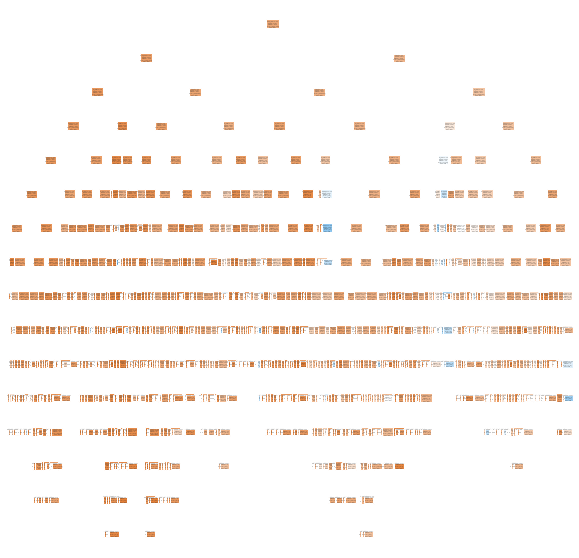

In [ ]:
previsores = ['CS_SEXO', 'CS_RACA', 'CS_ZONA', 'SURTO_SG', 'FATOR_RISC', 'VACINA',
              'ANTIVIRAL', 'FAIXA_ETARIA', 'SINTOMATICO']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(model_tree, feature_names=previsores, class_names = model_tree.classes_, filled=True)

##2.4 - Aprendizagem por Regras

In [ ]:
srag = Orange.data.Table('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/srag_am.csv')
#srag.domain # colunas 
cn2 = Orange.classification.rules.CN2Learner()
regras_srag = cn2(srag)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
for regras in regras_srag.rule_list:
  print(regras)

IF CS_SEXO==I THEN UTI=NAO 
IF CS_ZONA>=2.0 AND SINTOMATICO!=1.0 AND CS_SEXO!=F THEN UTI=NAO 
IF CS_ZONA>=2.0 AND SINTOMATICO!=1.0 AND CS_RACA>=5.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FAIXA_ETARIA==< 60 AND SINTOMATICO!=1.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FATOR_RISC==N AND CS_ZONA<=3.0 AND SINTOMATICO!=1.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FATOR_RISC==N AND SINTOMATICO!=1.0 THEN UTI=SIM 
IF SINTOMATICO!=1.0 AND CS_ZONA>=9.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND CS_ZONA<=3.0 AND CS_SEXO==F AND CS_RACA>=5.0 AND CS_ZONA>=3.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND CS_ZONA<=3.0 AND CS_SEXO==F AND CS_RACA>=5.0 AND ANTIVIRAL>=9.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FATOR_RISC==N AND CS_ZONA<=3.0 AND FAIXA_ETARIA==< 60 AND SURTO_SG>=9.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FATOR_RISC==N AND CS_ZONA<=3.0 AND CS_SEXO==F AND ANTIVIRAL>=9.0 THEN UTI=NAO 
IF CS_ZONA>=2.0 AND FATOR_RISC==N AND CS_ZONA<=3.0 AND CS_SEXO==F AND SURTO_SG>=2.0 THEN UTI=NAO 
IF FATOR_RISC==N AND CS_ZONA>=2.0 AND CS_ZONA<=3.0 AND CS_RAC

##2.5 - Aprendizagem baseada em Instâncias - KNN

              precision    recall  f1-score   support

         NAO       0.61      0.60      0.60      2949
         SIM       0.61      0.62      0.61      2949

    accuracy                           0.61      5898
   macro avg       0.61      0.61      0.61      5898
weighted avg       0.61      0.61      0.61      5898

[[1757 1192]
 [1122 1827]]


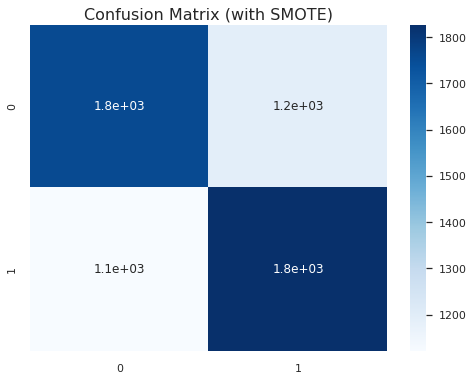

In [ ]:
knn_srag = KNeighborsClassifier(n_neighbors=20, p= 1)  # n_neighbors=5, metric='minkowski', p = 2
knn_srag.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
previsoes_knn = knn_srag.predict(X_srag_teste_balance)

print(classification_report(y_srag_teste_balance, previsoes_knn))
cmKNN = confusion_matrix(y_srag_teste_balance, previsoes_knn,labels=["NAO","SIM"])
print(cmKNN)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmKNN, annot=True, cmap='Blues');

##2.6 - Regressão Logistíca

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

         NAO       0.59      0.54      0.56      2949
         SIM       0.58      0.63      0.60      2949

    accuracy                           0.58      5898
   macro avg       0.58      0.58      0.58      5898
weighted avg       0.58      0.58      0.58      5898

[[1586 1363]
 [1101 1848]]


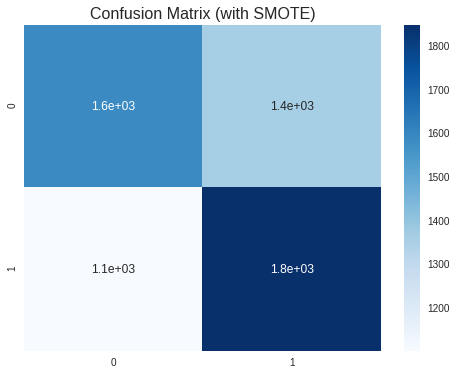

In [ ]:
logistic_srag = LogisticRegression(C=1.0, solver='sag', tol=0.000001)  
logistic_srag.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
previsoesLogistica = logistic_srag.predict(X_srag_teste_balance)

print(classification_report(y_srag_teste_balance, previsoesLogistica))
labels=['NAO','SIM']
cmLogistica = confusion_matrix(y_srag_teste_balance, previsoesLogistica, labels)
print(cmLogistica)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmLogistica, annot=True, cmap='Blues');

##2.7 - SVM

              precision    recall  f1-score   support

         NAO       0.62      0.54      0.58      2949
         SIM       0.59      0.68      0.63      2949

    accuracy                           0.61      5898
   macro avg       0.61      0.61      0.60      5898
weighted avg       0.61      0.61      0.60      5898

[[1581 1368]
 [ 958 1991]]


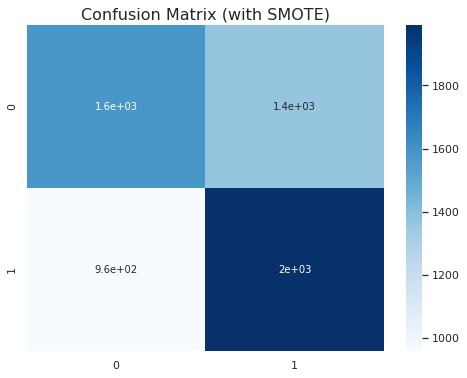

In [ ]:
svm_srag = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_srag.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
previsoesSVM = svm_srag.predict(X_srag_teste_balance)

print(classification_report(y_srag_teste_balance, previsoesSVM))
cmSVM = confusion_matrix(y_srag_teste_balance, previsoesSVM,labels=["NAO","SIM"])
print(cmSVM)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmSVM, annot=True, cmap='Blues');

##2.8 - Redes Neurais

Iteration 1, loss = 0.66233406
Iteration 2, loss = 0.65780692
Iteration 3, loss = 0.65684161
Iteration 4, loss = 0.65617477
Iteration 5, loss = 0.65576967
Iteration 6, loss = 0.65534182
Iteration 7, loss = 0.65497124
Iteration 8, loss = 0.65465365
Iteration 9, loss = 0.65433871
Iteration 10, loss = 0.65417332
Iteration 11, loss = 0.65394447
Iteration 12, loss = 0.65378987
Iteration 13, loss = 0.65361578
Iteration 14, loss = 0.65350558
Iteration 15, loss = 0.65337114
Iteration 16, loss = 0.65333332
Iteration 17, loss = 0.65325019
Iteration 18, loss = 0.65314201
Iteration 19, loss = 0.65306953
Iteration 20, loss = 0.65303413
Iteration 21, loss = 0.65300812
Iteration 22, loss = 0.65293439
Iteration 23, loss = 0.65287856
Iteration 24, loss = 0.65283349
Iteration 25, loss = 0.65284399
Iteration 26, loss = 0.65273362
Iteration 27, loss = 0.65272543
Iteration 28, loss = 0.65264777
Iteration 29, loss = 0.65261448
Iteration 30, loss = 0.65255818
Iteration 31, loss = 0.65249032
Iteration 32, los

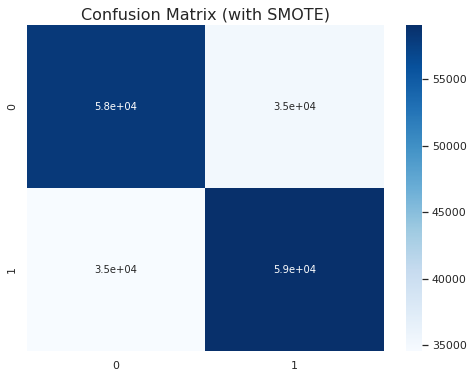

In [ ]:
rede_neural_srag = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20)) #activation= 'relu', batch_size= 56, solver= 'adam'
rede_neural_srag.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
previsoesRedeNeural = rede_neural_srag.predict(X_srag_teste_balance)

print(classification_report(y_srag_teste_balance, previsoesRedeNeural))
cmRedeNeural = confusion_matrix(y_srag_teste_balance, previsoesRedeNeural,labels=["NAO","SIM"])
print(cmRedeNeural)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cmRedeNeural, annot=True, cmap='Blues');

#III - Avaliação dos algoritmos

##3.1 - Tuning dos parâmetros com GridSearch

Procura identificar a combinação de parâmetros para os modelos.

###Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV # Aplicar a validação cruzada

In [ ]:
#X_srag = np.concatenate((X_srag_treinamento_balance, X_srag_teste_balance), axis = 0) # Concatena os previsores por linha
#y_srag = np.concatenate((y_srag_treinamento_balance, y_srag_teste_balance), axis = 0) # Concatena as classes por linha

###Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_srag, y_srag)
melhores_paramentos = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentos)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.6384282807731434


###Random forest

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_srag, y_srag)
melhores_paramentos = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentos)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.6419379450661242


###KNN

In [ ]:
parametros = {'n_neighbors':[3,5,10,20],'p':[1,2]} # 1 - distância elclidiana, 2 - manhatan

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_srag, y_srag)
melhores_paramentos = grid_search.best_params_
mellhor_resultado = grid_search.best_score_
print(melhores_paramentos)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.6419379450661242


###Regressão Logística

In [ ]:
parametros = {
              'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs','sag','saga']
            }

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_srag, y_srag)
melhores_paramentos = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentos)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.5877416073245169


###Redes Neurais

In [ ]:
parametros = {'activation':['relu', 'logistic', 'tahn'],
              'solver':['adam','sgd'],
              'batch_size':[10,56]}

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_srag, y_srag)
melhores_paramentos = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentos)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.6161241098677517


##3.2 - Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_redes_neurais = []

In [ ]:
for i in range(30):
  print('===========================================')
  print(i+1)
  print('===========================================')
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  # Com os melhores atributos obtidos no Tuning
  arvore = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
  scores = cross_val_score(arvore, X_srag, y_srag, cv = kfold)
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 150)
  scores = cross_val_score(random_forest, X_srag, y_srag, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors=20, p= 1)
  scores = cross_val_score(knn, X_srag, y_srag, cv = kfold)
  resultados_knn.append(scores.mean()) 

  logistic = LogisticRegression(C=1.0, solver='sag', tol=0.000001)
  scores = cross_val_score(logistic, X_srag, y_srag, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel='rbf', random_state=1, C = 2.0)
  scores = cross_val_score(svm, X_srag, y_srag, cv = kfold)
  resultados_svm.append(scores.mean())

  neural_network = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
  scores = cross_val_score(neural_network, X_srag, y_srag, cv = kfold)
  resultados_redes_neurais.append(scores.mean())

1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68207178
Iteration 2, loss = 0.66699670
Iteration 3, loss = 0.66428125
Iteration 4, loss = 0.66277613
Iteration 5, loss = 0.66147337
Iteration 6, loss = 0.66077050
Iteration 7, loss = 0.66008757
Iteration 8, loss = 0.65905580
Iteration 9, loss = 0.65836060
Iteration 10, loss = 0.65779421
Iteration 11, loss = 0.65758493
Iteration 12, loss = 0.65684966
Iteration 13, loss = 0.65675454
Iteration 14, loss = 0.65617238
Iteration 15, loss = 0.65553213
Iteration 16, loss = 0.65571288
Iteration 17, loss = 0.65528018
Iteration 18, loss = 0.65485013
Iteration 19, loss = 0.65445100
Iteration 20, loss = 0.65438024
Iteration 21, loss = 0.65402662
Iteration 22, loss = 0.65379425
Iteration 23, loss = 0.65382625
Iteration 24, loss = 0.65311223
Iteration 25, loss = 0.65305051
Iteration 26, loss = 0.65274203
Iteration 27, loss = 0.65260576
Iteration 28, loss = 0.65246770
Iteration 29, loss = 0.65198984
Iteration 30, loss = 0.65213670
Iteration 31, loss = 0.65185454
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68016853
Iteration 2, loss = 0.66731550
Iteration 3, loss = 0.66499909
Iteration 4, loss = 0.66343410
Iteration 5, loss = 0.66213773
Iteration 6, loss = 0.66120104
Iteration 7, loss = 0.66042514
Iteration 8, loss = 0.65978476
Iteration 9, loss = 0.65907760
Iteration 10, loss = 0.65880807
Iteration 11, loss = 0.65816030
Iteration 12, loss = 0.65742530
Iteration 13, loss = 0.65693954
Iteration 14, loss = 0.65662200
Iteration 15, loss = 0.65599977
Iteration 16, loss = 0.65578529
Iteration 17, loss = 0.65537822
Iteration 18, loss = 0.65510841
Iteration 19, loss = 0.65470643
Iteration 20, loss = 0.65446074
Iteration 21, loss = 0.65431276
Iteration 22, loss = 0.65376045
Iteration 23, loss = 0.65354791
Iteration 24, loss = 0.65302703
Iteration 25, loss = 0.65312491
Iteration 26, loss = 0.65296462
Iteration 27, loss = 0.65258890
Iteration 28, loss = 0.65249849
Iteration 29, loss = 0.65232307
Iteration 30, loss = 0.65188677
Iteration 31, loss = 0.65162774
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67675149
Iteration 2, loss = 0.66574075
Iteration 3, loss = 0.66344037
Iteration 4, loss = 0.66190806
Iteration 5, loss = 0.66084811
Iteration 6, loss = 0.66007237
Iteration 7, loss = 0.65929912
Iteration 8, loss = 0.65858042
Iteration 9, loss = 0.65812151
Iteration 10, loss = 0.65746952
Iteration 11, loss = 0.65730065
Iteration 12, loss = 0.65686138
Iteration 13, loss = 0.65643856
Iteration 14, loss = 0.65608104
Iteration 15, loss = 0.65580831
Iteration 16, loss = 0.65547189
Iteration 17, loss = 0.65507385
Iteration 18, loss = 0.65486366
Iteration 19, loss = 0.65492660
Iteration 20, loss = 0.65452286
Iteration 21, loss = 0.65403407
Iteration 22, loss = 0.65381172
Iteration 23, loss = 0.65378860
Iteration 24, loss = 0.65331888
Iteration 25, loss = 0.65329802
Iteration 26, loss = 0.65316470
Iteration 27, loss = 0.65289015
Iteration 28, loss = 0.65275587
Iteration 29, loss = 0.65211627
Iteration 30, loss = 0.65243376
Iteration 31, loss = 0.65190050
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67815497
Iteration 2, loss = 0.66690901
Iteration 3, loss = 0.66428299
Iteration 4, loss = 0.66277334
Iteration 5, loss = 0.66179376
Iteration 6, loss = 0.66081126
Iteration 7, loss = 0.66019343
Iteration 8, loss = 0.65957554
Iteration 9, loss = 0.65926747
Iteration 10, loss = 0.65855456
Iteration 11, loss = 0.65815603
Iteration 12, loss = 0.65749445
Iteration 13, loss = 0.65754729
Iteration 14, loss = 0.65671589
Iteration 15, loss = 0.65681034
Iteration 16, loss = 0.65599852
Iteration 17, loss = 0.65572545
Iteration 18, loss = 0.65546529
Iteration 19, loss = 0.65556509
Iteration 20, loss = 0.65521933
Iteration 21, loss = 0.65454755
Iteration 22, loss = 0.65441749
Iteration 23, loss = 0.65415861
Iteration 24, loss = 0.65388812
Iteration 25, loss = 0.65387753
Iteration 26, loss = 0.65368714
Iteration 27, loss = 0.65332698
Iteration 28, loss = 0.65305249
Iteration 29, loss = 0.65327247
Iteration 30, loss = 0.65271499
Iteration 31, loss = 0.65260045
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68376436
Iteration 2, loss = 0.66912164
Iteration 3, loss = 0.66618984
Iteration 4, loss = 0.66459914
Iteration 5, loss = 0.66353737
Iteration 6, loss = 0.66276221
Iteration 7, loss = 0.66183431
Iteration 8, loss = 0.66119335
Iteration 9, loss = 0.66061269
Iteration 10, loss = 0.66021195
Iteration 11, loss = 0.65938842
Iteration 12, loss = 0.65904440
Iteration 13, loss = 0.65835239
Iteration 14, loss = 0.65790434
Iteration 15, loss = 0.65754237
Iteration 16, loss = 0.65711062
Iteration 17, loss = 0.65664969
Iteration 18, loss = 0.65648185
Iteration 19, loss = 0.65598812
Iteration 20, loss = 0.65577311
Iteration 21, loss = 0.65572300
Iteration 22, loss = 0.65509162
Iteration 23, loss = 0.65480922
Iteration 24, loss = 0.65472126
Iteration 25, loss = 0.65431103
Iteration 26, loss = 0.65418736
Iteration 27, loss = 0.65411281
Iteration 28, loss = 0.65355921
Iteration 29, loss = 0.65356501
Iteration 30, loss = 0.65370857
Iteration 31, loss = 0.65295334
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69653548
Iteration 2, loss = 0.67050292
Iteration 3, loss = 0.66662631
Iteration 4, loss = 0.66469185
Iteration 5, loss = 0.66331874
Iteration 6, loss = 0.66207442
Iteration 7, loss = 0.66130499
Iteration 8, loss = 0.66037552
Iteration 9, loss = 0.65958568
Iteration 10, loss = 0.65880058
Iteration 11, loss = 0.65807280
Iteration 12, loss = 0.65738854
Iteration 13, loss = 0.65670907
Iteration 14, loss = 0.65606505
Iteration 15, loss = 0.65588375
Iteration 16, loss = 0.65524789
Iteration 17, loss = 0.65470220
Iteration 18, loss = 0.65441822
Iteration 19, loss = 0.65376876
Iteration 20, loss = 0.65383897
Iteration 21, loss = 0.65284946
Iteration 22, loss = 0.65313804
Iteration 23, loss = 0.65241027
Iteration 24, loss = 0.65227439
Iteration 25, loss = 0.65150784
Iteration 26, loss = 0.65150254
Iteration 27, loss = 0.65116811
Iteration 28, loss = 0.65097813
Iteration 29, loss = 0.65072730
Iteration 30, loss = 0.65068655
Iteration 31, loss = 0.65033069
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68154028
Iteration 2, loss = 0.66862880
Iteration 3, loss = 0.66576918
Iteration 4, loss = 0.66419952
Iteration 5, loss = 0.66271793
Iteration 6, loss = 0.66176376
Iteration 7, loss = 0.66064646
Iteration 8, loss = 0.66005588
Iteration 9, loss = 0.65936848
Iteration 10, loss = 0.65897127
Iteration 11, loss = 0.65854010
Iteration 12, loss = 0.65807330
Iteration 13, loss = 0.65768555
Iteration 14, loss = 0.65708656
Iteration 15, loss = 0.65702033
Iteration 16, loss = 0.65674135
Iteration 17, loss = 0.65610675
Iteration 18, loss = 0.65610747
Iteration 19, loss = 0.65592653
Iteration 20, loss = 0.65556046
Iteration 21, loss = 0.65545854
Iteration 22, loss = 0.65502550
Iteration 23, loss = 0.65494269
Iteration 24, loss = 0.65467209
Iteration 25, loss = 0.65435469
Iteration 26, loss = 0.65418710
Iteration 27, loss = 0.65403715
Iteration 28, loss = 0.65405485
Iteration 29, loss = 0.65404844
Iteration 30, loss = 0.65341571
Iteration 31, loss = 0.65322748
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67950984
Iteration 2, loss = 0.66764546
Iteration 3, loss = 0.66564441
Iteration 4, loss = 0.66415527
Iteration 5, loss = 0.66303323
Iteration 6, loss = 0.66196443
Iteration 7, loss = 0.66118459
Iteration 8, loss = 0.66049791
Iteration 9, loss = 0.65985192
Iteration 10, loss = 0.65937325
Iteration 11, loss = 0.65907823
Iteration 12, loss = 0.65840594
Iteration 13, loss = 0.65799319
Iteration 14, loss = 0.65761577
Iteration 15, loss = 0.65723938
Iteration 16, loss = 0.65668492
Iteration 17, loss = 0.65653957
Iteration 18, loss = 0.65640936
Iteration 19, loss = 0.65604471
Iteration 20, loss = 0.65600555
Iteration 21, loss = 0.65567520
Iteration 22, loss = 0.65519525
Iteration 23, loss = 0.65472037
Iteration 24, loss = 0.65484322
Iteration 25, loss = 0.65462730
Iteration 26, loss = 0.65429941
Iteration 27, loss = 0.65421538
Iteration 28, loss = 0.65396517
Iteration 29, loss = 0.65359251
Iteration 30, loss = 0.65359471
Iteration 31, loss = 0.65324506
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69178590
Iteration 2, loss = 0.66794723
Iteration 3, loss = 0.66515800
Iteration 4, loss = 0.66374764
Iteration 5, loss = 0.66263815
Iteration 6, loss = 0.66207807
Iteration 7, loss = 0.66131924
Iteration 8, loss = 0.66058525
Iteration 9, loss = 0.66005289
Iteration 10, loss = 0.65963384
Iteration 11, loss = 0.65914772
Iteration 12, loss = 0.65888989
Iteration 13, loss = 0.65823510
Iteration 14, loss = 0.65780176
Iteration 15, loss = 0.65753217
Iteration 16, loss = 0.65703641
Iteration 17, loss = 0.65685135
Iteration 18, loss = 0.65624983
Iteration 19, loss = 0.65620320
Iteration 20, loss = 0.65590938
Iteration 21, loss = 0.65556282
Iteration 22, loss = 0.65541900
Iteration 23, loss = 0.65477078
Iteration 24, loss = 0.65471396
Iteration 25, loss = 0.65418261
Iteration 26, loss = 0.65407261
Iteration 27, loss = 0.65369970
Iteration 28, loss = 0.65334327
Iteration 29, loss = 0.65330212
Iteration 30, loss = 0.65298566
Iteration 31, loss = 0.65260497
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67557365
Iteration 2, loss = 0.66668189
Iteration 3, loss = 0.66468154
Iteration 4, loss = 0.66299407
Iteration 5, loss = 0.66185539
Iteration 6, loss = 0.66116280
Iteration 7, loss = 0.66063719
Iteration 8, loss = 0.65987014
Iteration 9, loss = 0.65935783
Iteration 10, loss = 0.65857795
Iteration 11, loss = 0.65812713
Iteration 12, loss = 0.65763933
Iteration 13, loss = 0.65721022
Iteration 14, loss = 0.65708798
Iteration 15, loss = 0.65669215
Iteration 16, loss = 0.65630643
Iteration 17, loss = 0.65584554
Iteration 18, loss = 0.65574335
Iteration 19, loss = 0.65529473
Iteration 20, loss = 0.65486979
Iteration 21, loss = 0.65452548
Iteration 22, loss = 0.65466363
Iteration 23, loss = 0.65417163
Iteration 24, loss = 0.65363687
Iteration 25, loss = 0.65374827
Iteration 26, loss = 0.65343892
Iteration 27, loss = 0.65312500
Iteration 28, loss = 0.65331773
Iteration 29, loss = 0.65262553
Iteration 30, loss = 0.65275488
Iteration 31, loss = 0.65224876
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68387726
Iteration 2, loss = 0.66620954
Iteration 3, loss = 0.66400871
Iteration 4, loss = 0.66260806
Iteration 5, loss = 0.66151642
Iteration 6, loss = 0.66077663
Iteration 7, loss = 0.65991317
Iteration 8, loss = 0.65924562
Iteration 9, loss = 0.65856484
Iteration 10, loss = 0.65803698
Iteration 11, loss = 0.65750343
Iteration 12, loss = 0.65685877
Iteration 13, loss = 0.65645584
Iteration 14, loss = 0.65581697
Iteration 15, loss = 0.65511611
Iteration 16, loss = 0.65489520
Iteration 17, loss = 0.65444906
Iteration 18, loss = 0.65412966
Iteration 19, loss = 0.65379455
Iteration 20, loss = 0.65364834
Iteration 21, loss = 0.65304302
Iteration 22, loss = 0.65269548
Iteration 23, loss = 0.65222645
Iteration 24, loss = 0.65195945
Iteration 25, loss = 0.65157030
Iteration 26, loss = 0.65129529
Iteration 27, loss = 0.65099375
Iteration 28, loss = 0.65096781
Iteration 29, loss = 0.65087416
Iteration 30, loss = 0.65036470
Iteration 31, loss = 0.65002832
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68421610
Iteration 2, loss = 0.66822224
Iteration 3, loss = 0.66468697
Iteration 4, loss = 0.66287771
Iteration 5, loss = 0.66161805
Iteration 6, loss = 0.66071538
Iteration 7, loss = 0.66031326
Iteration 8, loss = 0.65958349
Iteration 9, loss = 0.65902779
Iteration 10, loss = 0.65882419
Iteration 11, loss = 0.65838473
Iteration 12, loss = 0.65792919
Iteration 13, loss = 0.65781381
Iteration 14, loss = 0.65716877
Iteration 15, loss = 0.65726572
Iteration 16, loss = 0.65684315
Iteration 17, loss = 0.65672890
Iteration 18, loss = 0.65635133
Iteration 19, loss = 0.65592562
Iteration 20, loss = 0.65572720
Iteration 21, loss = 0.65551828
Iteration 22, loss = 0.65522057
Iteration 23, loss = 0.65500608
Iteration 24, loss = 0.65481051
Iteration 25, loss = 0.65471917
Iteration 26, loss = 0.65424573
Iteration 27, loss = 0.65411150
Iteration 28, loss = 0.65392013
Iteration 29, loss = 0.65378286
Iteration 30, loss = 0.65351634
Iteration 31, loss = 0.65320517
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68185789
Iteration 2, loss = 0.66988997
Iteration 3, loss = 0.66614391
Iteration 4, loss = 0.66417066
Iteration 5, loss = 0.66289512
Iteration 6, loss = 0.66216438
Iteration 7, loss = 0.66109605
Iteration 8, loss = 0.66051680
Iteration 9, loss = 0.66004243
Iteration 10, loss = 0.65941363
Iteration 11, loss = 0.65889008
Iteration 12, loss = 0.65832813
Iteration 13, loss = 0.65812029
Iteration 14, loss = 0.65772135
Iteration 15, loss = 0.65728460
Iteration 16, loss = 0.65693408
Iteration 17, loss = 0.65675184
Iteration 18, loss = 0.65620135
Iteration 19, loss = 0.65603251
Iteration 20, loss = 0.65567187
Iteration 21, loss = 0.65519212
Iteration 22, loss = 0.65485549
Iteration 23, loss = 0.65471632
Iteration 24, loss = 0.65431638
Iteration 25, loss = 0.65407902
Iteration 26, loss = 0.65388720
Iteration 27, loss = 0.65363734
Iteration 28, loss = 0.65324039
Iteration 29, loss = 0.65314916
Iteration 30, loss = 0.65271667
Iteration 31, loss = 0.65250969
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67942811
Iteration 2, loss = 0.66681775
Iteration 3, loss = 0.66404747
Iteration 4, loss = 0.66239934
Iteration 5, loss = 0.66086389
Iteration 6, loss = 0.66000829
Iteration 7, loss = 0.65907528
Iteration 8, loss = 0.65862163
Iteration 9, loss = 0.65804324
Iteration 10, loss = 0.65758252
Iteration 11, loss = 0.65731492
Iteration 12, loss = 0.65712488
Iteration 13, loss = 0.65618151
Iteration 14, loss = 0.65573483
Iteration 15, loss = 0.65530759
Iteration 16, loss = 0.65513874
Iteration 17, loss = 0.65450092
Iteration 18, loss = 0.65411889
Iteration 19, loss = 0.65372398
Iteration 20, loss = 0.65373962
Iteration 21, loss = 0.65324460
Iteration 22, loss = 0.65311164
Iteration 23, loss = 0.65288552
Iteration 24, loss = 0.65245751
Iteration 25, loss = 0.65225324
Iteration 26, loss = 0.65183607
Iteration 27, loss = 0.65152089
Iteration 28, loss = 0.65131195
Iteration 29, loss = 0.65099027
Iteration 30, loss = 0.65092124
Iteration 31, loss = 0.65050826
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69023069
Iteration 2, loss = 0.66745899
Iteration 3, loss = 0.66443481
Iteration 4, loss = 0.66256714
Iteration 5, loss = 0.66166763
Iteration 6, loss = 0.66062303
Iteration 7, loss = 0.65991152
Iteration 8, loss = 0.65916729
Iteration 9, loss = 0.65868894
Iteration 10, loss = 0.65822262
Iteration 11, loss = 0.65733219
Iteration 12, loss = 0.65717442
Iteration 13, loss = 0.65627540
Iteration 14, loss = 0.65617007
Iteration 15, loss = 0.65549908
Iteration 16, loss = 0.65507118
Iteration 17, loss = 0.65459606
Iteration 18, loss = 0.65448624
Iteration 19, loss = 0.65386914
Iteration 20, loss = 0.65350257
Iteration 21, loss = 0.65359501
Iteration 22, loss = 0.65309001
Iteration 23, loss = 0.65291312
Iteration 24, loss = 0.65262632
Iteration 25, loss = 0.65214942
Iteration 26, loss = 0.65209239
Iteration 27, loss = 0.65186562
Iteration 28, loss = 0.65122574
Iteration 29, loss = 0.65121097
Iteration 30, loss = 0.65102554
Iteration 31, loss = 0.65077292
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69102135
Iteration 2, loss = 0.66621198
Iteration 3, loss = 0.66373318
Iteration 4, loss = 0.66262338
Iteration 5, loss = 0.66152451
Iteration 6, loss = 0.66092375
Iteration 7, loss = 0.66037674
Iteration 8, loss = 0.65960471
Iteration 9, loss = 0.65897191
Iteration 10, loss = 0.65831882
Iteration 11, loss = 0.65801123
Iteration 12, loss = 0.65730000
Iteration 13, loss = 0.65677303
Iteration 14, loss = 0.65637812
Iteration 15, loss = 0.65622135
Iteration 16, loss = 0.65549263
Iteration 17, loss = 0.65515182
Iteration 18, loss = 0.65480040
Iteration 19, loss = 0.65458109
Iteration 20, loss = 0.65429125
Iteration 21, loss = 0.65393137
Iteration 22, loss = 0.65347897
Iteration 23, loss = 0.65333549
Iteration 24, loss = 0.65273081
Iteration 25, loss = 0.65254980
Iteration 26, loss = 0.65209000
Iteration 27, loss = 0.65174851
Iteration 28, loss = 0.65172234
Iteration 29, loss = 0.65133814
Iteration 30, loss = 0.65118056
Iteration 31, loss = 0.65085554
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.66464797
Iteration 4, loss = 0.66306128
Iteration 5, loss = 0.66185764
Iteration 6, loss = 0.66091340
Iteration 7, loss = 0.66011033
Iteration 8, loss = 0.65957882
Iteration 9, loss = 0.65919908
Iteration 10, loss = 0.65890094
Iteration 11, loss = 0.65830984
Iteration 12, loss = 0.65811817
Iteration 13, loss = 0.65731176
Iteration 14, loss = 0.65708297
Iteration 15, loss = 0.65679310
Iteration 16, loss = 0.65654561
Iteration 17, loss = 0.65593834
Iteration 18, loss = 0.65589703
Iteration 19, loss = 0.65520984
Iteration 20, loss = 0.65500250
Iteration 21, loss = 0.65466053
Iteration 22, loss = 0.65435206
Iteration 23, loss = 0.65385641
Iteration 24, loss = 0.65357718
Iteration 25, loss = 0.65338991
Iteration 26, loss = 0.65299572
Iteration 27, loss = 0.65287909
Iteration 28, loss = 0.65249062
Iteration 29, loss = 0.65213812
Iteration 30, loss = 0.65216747
Iteration 31, loss = 0.65179795
Iteration 32, loss = 0.65168871

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69102629
Iteration 2, loss = 0.66836943
Iteration 3, loss = 0.66554623
Iteration 4, loss = 0.66380111
Iteration 5, loss = 0.66310139
Iteration 6, loss = 0.66243948
Iteration 7, loss = 0.66186284
Iteration 8, loss = 0.66127388
Iteration 9, loss = 0.66090013
Iteration 10, loss = 0.66036210
Iteration 11, loss = 0.65971462
Iteration 12, loss = 0.65941791
Iteration 13, loss = 0.65877135
Iteration 14, loss = 0.65819376
Iteration 15, loss = 0.65801357
Iteration 16, loss = 0.65747451
Iteration 17, loss = 0.65702972
Iteration 18, loss = 0.65648832
Iteration 19, loss = 0.65653354
Iteration 20, loss = 0.65587716
Iteration 21, loss = 0.65554866
Iteration 22, loss = 0.65542827
Iteration 23, loss = 0.65491086
Iteration 24, loss = 0.65505768
Iteration 25, loss = 0.65457729
Iteration 26, loss = 0.65428578
Iteration 27, loss = 0.65382343
Iteration 28, loss = 0.65375732
Iteration 29, loss = 0.65367781
Iteration 30, loss = 0.65287963
Iteration 31, loss = 0.65313799
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67778010
Iteration 2, loss = 0.66550703
Iteration 3, loss = 0.66326307
Iteration 4, loss = 0.66191523
Iteration 5, loss = 0.66097243
Iteration 6, loss = 0.66017186
Iteration 7, loss = 0.65973504
Iteration 8, loss = 0.65898919
Iteration 9, loss = 0.65870963
Iteration 10, loss = 0.65822365
Iteration 11, loss = 0.65763341
Iteration 12, loss = 0.65722415
Iteration 13, loss = 0.65674384
Iteration 14, loss = 0.65640383
Iteration 15, loss = 0.65623812
Iteration 16, loss = 0.65574016
Iteration 17, loss = 0.65533158
Iteration 18, loss = 0.65498751
Iteration 19, loss = 0.65484306
Iteration 20, loss = 0.65456220
Iteration 21, loss = 0.65419637
Iteration 22, loss = 0.65388610
Iteration 23, loss = 0.65367106
Iteration 24, loss = 0.65341684
Iteration 25, loss = 0.65332767
Iteration 26, loss = 0.65291655
Iteration 27, loss = 0.65281535
Iteration 28, loss = 0.65268938
Iteration 29, loss = 0.65216385
Iteration 30, loss = 0.65202631
Iteration 31, loss = 0.65184950
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.69540596
Iteration 2, loss = 0.66538136
Iteration 3, loss = 0.66337268
Iteration 4, loss = 0.66192920
Iteration 5, loss = 0.66099382
Iteration 6, loss = 0.66036391
Iteration 7, loss = 0.65960840
Iteration 8, loss = 0.65896056
Iteration 9, loss = 0.65815193
Iteration 10, loss = 0.65768039
Iteration 11, loss = 0.65729469
Iteration 12, loss = 0.65668070
Iteration 13, loss = 0.65622571
Iteration 14, loss = 0.65631204
Iteration 15, loss = 0.65565911
Iteration 16, loss = 0.65534017
Iteration 17, loss = 0.65461016
Iteration 18, loss = 0.65473838
Iteration 19, loss = 0.65433482
Iteration 20, loss = 0.65391862
Iteration 21, loss = 0.65391800
Iteration 22, loss = 0.65344990
Iteration 23, loss = 0.65303102
Iteration 24, loss = 0.65323654
Iteration 25, loss = 0.65258079
Iteration 26, loss = 0.65244948
Iteration 27, loss = 0.65236482
Iteration 28, loss = 0.65225206
Iteration 29, loss = 0.65202805
Iteration 30, loss = 0.65182901
Iteration 31, loss = 0.65169932
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68016471
Iteration 2, loss = 0.66614940
Iteration 3, loss = 0.66361452
Iteration 4, loss = 0.66231951
Iteration 5, loss = 0.66159695
Iteration 6, loss = 0.66071568
Iteration 7, loss = 0.66026844
Iteration 8, loss = 0.65985063
Iteration 9, loss = 0.65903117
Iteration 10, loss = 0.65890633
Iteration 11, loss = 0.65841632
Iteration 12, loss = 0.65827270
Iteration 13, loss = 0.65743655
Iteration 14, loss = 0.65699396
Iteration 15, loss = 0.65661478
Iteration 16, loss = 0.65660477
Iteration 17, loss = 0.65587841
Iteration 18, loss = 0.65583111
Iteration 19, loss = 0.65545469
Iteration 20, loss = 0.65517256
Iteration 21, loss = 0.65487175
Iteration 22, loss = 0.65456800
Iteration 23, loss = 0.65411017
Iteration 24, loss = 0.65415385
Iteration 25, loss = 0.65388045
Iteration 26, loss = 0.65346693
Iteration 27, loss = 0.65343242
Iteration 28, loss = 0.65310907
Iteration 29, loss = 0.65288969
Iteration 30, loss = 0.65290013
Iteration 31, loss = 0.65234058
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68106974
Iteration 2, loss = 0.66630786
Iteration 3, loss = 0.66440057
Iteration 4, loss = 0.66289657
Iteration 5, loss = 0.66183900
Iteration 6, loss = 0.66117054
Iteration 7, loss = 0.66042596
Iteration 8, loss = 0.65998020
Iteration 9, loss = 0.65926439
Iteration 10, loss = 0.65904828
Iteration 11, loss = 0.65861866
Iteration 12, loss = 0.65833137
Iteration 13, loss = 0.65774299
Iteration 14, loss = 0.65730871
Iteration 15, loss = 0.65693226
Iteration 16, loss = 0.65662038
Iteration 17, loss = 0.65630243
Iteration 18, loss = 0.65605673
Iteration 19, loss = 0.65580486
Iteration 20, loss = 0.65541366
Iteration 21, loss = 0.65532620
Iteration 22, loss = 0.65489191
Iteration 23, loss = 0.65485312
Iteration 24, loss = 0.65469853
Iteration 25, loss = 0.65417377
Iteration 26, loss = 0.65406438
Iteration 27, loss = 0.65395654
Iteration 28, loss = 0.65350526
Iteration 29, loss = 0.65367582
Iteration 30, loss = 0.65348581
Iteration 31, loss = 0.65315407
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = inf
Iteration 2, loss = 0.66661513
Iteration 3, loss = 0.66422655
Iteration 4, loss = 0.66265773
Iteration 5, loss = 0.66206834
Iteration 6, loss = 0.66085829
Iteration 7, loss = 0.65987045
Iteration 8, loss = 0.65934845
Iteration 9, loss = 0.65907015
Iteration 10, loss = 0.65855250
Iteration 11, loss = 0.65844290
Iteration 12, loss = 0.65790604
Iteration 13, loss = 0.65763218
Iteration 14, loss = 0.65700964
Iteration 15, loss = 0.65685358
Iteration 16, loss = 0.65673907
Iteration 17, loss = 0.65623817
Iteration 18, loss = 0.65605847
Iteration 19, loss = 0.65542750
Iteration 20, loss = 0.65536257
Iteration 21, loss = 0.65503911
Iteration 22, loss = 0.65507014
Iteration 23, loss = 0.65434341
Iteration 24, loss = 0.65441145
Iteration 25, loss = 0.65381731
Iteration 26, loss = 0.65337749
Iteration 27, loss = 0.65322788
Iteration 28, loss = 0.65278771
Iteration 29, loss = 0.65257594
Iteration 30, loss = 0.65239082
Iteration 31, loss = 0.65231958
Iteration 32, loss = 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67650321
Iteration 2, loss = 0.66682237
Iteration 3, loss = 0.66486302
Iteration 4, loss = 0.66357765
Iteration 5, loss = 0.66253646
Iteration 6, loss = 0.66186228
Iteration 7, loss = 0.66127052
Iteration 8, loss = 0.66102669
Iteration 9, loss = 0.66035266
Iteration 10, loss = 0.65987335
Iteration 11, loss = 0.65941913
Iteration 12, loss = 0.65934589
Iteration 13, loss = 0.65890656
Iteration 14, loss = 0.65842024
Iteration 15, loss = 0.65817564
Iteration 16, loss = 0.65777072
Iteration 17, loss = 0.65782309
Iteration 18, loss = 0.65718847
Iteration 19, loss = 0.65678883
Iteration 20, loss = 0.65647498
Iteration 21, loss = 0.65621609
Iteration 22, loss = 0.65564605
Iteration 23, loss = 0.65566794
Iteration 24, loss = 0.65495723
Iteration 25, loss = 0.65459722
Iteration 26, loss = 0.65467846
Iteration 27, loss = 0.65397309
Iteration 28, loss = 0.65369447
Iteration 29, loss = 0.65351811
Iteration 30, loss = 0.65337781
Iteration 31, loss = 0.65328374
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67793088
Iteration 2, loss = 0.66636682
Iteration 3, loss = 0.66396099
Iteration 4, loss = 0.66259130
Iteration 5, loss = 0.66139786
Iteration 6, loss = 0.66047343
Iteration 7, loss = 0.65980209
Iteration 8, loss = 0.65943349
Iteration 9, loss = 0.65866256
Iteration 10, loss = 0.65828661
Iteration 11, loss = 0.65769086
Iteration 12, loss = 0.65715813
Iteration 13, loss = 0.65695848
Iteration 14, loss = 0.65633110
Iteration 15, loss = 0.65613297
Iteration 16, loss = 0.65553261
Iteration 17, loss = 0.65534184
Iteration 18, loss = 0.65513482
Iteration 19, loss = 0.65483447
Iteration 20, loss = 0.65456035
Iteration 21, loss = 0.65432804
Iteration 22, loss = 0.65384790
Iteration 23, loss = 0.65359300
Iteration 24, loss = 0.65323031
Iteration 25, loss = 0.65284280
Iteration 26, loss = 0.65276759
Iteration 27, loss = 0.65250818
Iteration 28, loss = 0.65224086
Iteration 29, loss = 0.65212867
Iteration 30, loss = 0.65211865
Iteration 31, loss = 0.65171036
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68132799
Iteration 2, loss = 0.66747653
Iteration 3, loss = 0.66534290
Iteration 4, loss = 0.66380115
Iteration 5, loss = 0.66303378
Iteration 6, loss = 0.66234554
Iteration 7, loss = 0.66171701
Iteration 8, loss = 0.66079282
Iteration 9, loss = 0.66027156
Iteration 10, loss = 0.65961506
Iteration 11, loss = 0.65892787
Iteration 12, loss = 0.65838626
Iteration 13, loss = 0.65759905
Iteration 14, loss = 0.65722123
Iteration 15, loss = 0.65679586
Iteration 16, loss = 0.65648047
Iteration 17, loss = 0.65595356
Iteration 18, loss = 0.65550905
Iteration 19, loss = 0.65499813
Iteration 20, loss = 0.65496938
Iteration 21, loss = 0.65465494
Iteration 22, loss = 0.65444595
Iteration 23, loss = 0.65403565
Iteration 24, loss = 0.65357963
Iteration 25, loss = 0.65330084
Iteration 26, loss = 0.65344250
Iteration 27, loss = 0.65310878
Iteration 28, loss = 0.65284315
Iteration 29, loss = 0.65249500
Iteration 30, loss = 0.65252537
Iteration 31, loss = 0.65192396
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68403822
Iteration 2, loss = 0.66511099
Iteration 3, loss = 0.66311112
Iteration 4, loss = 0.66206099
Iteration 5, loss = 0.66105074
Iteration 6, loss = 0.66052315
Iteration 7, loss = 0.66003530
Iteration 8, loss = 0.65949081
Iteration 9, loss = 0.65908219
Iteration 10, loss = 0.65860563
Iteration 11, loss = 0.65823795
Iteration 12, loss = 0.65787092
Iteration 13, loss = 0.65753384
Iteration 14, loss = 0.65723355
Iteration 15, loss = 0.65689778
Iteration 16, loss = 0.65666829
Iteration 17, loss = 0.65621844
Iteration 18, loss = 0.65604918
Iteration 19, loss = 0.65571779
Iteration 20, loss = 0.65549908
Iteration 21, loss = 0.65513230
Iteration 22, loss = 0.65501563
Iteration 23, loss = 0.65475015
Iteration 24, loss = 0.65453959
Iteration 25, loss = 0.65447403
Iteration 26, loss = 0.65415287
Iteration 27, loss = 0.65366049
Iteration 28, loss = 0.65367419
Iteration 29, loss = 0.65368462
Iteration 30, loss = 0.65336979
Iteration 31, loss = 0.65331233
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.68214190
Iteration 2, loss = 0.66766115
Iteration 3, loss = 0.66448032
Iteration 4, loss = 0.66288552
Iteration 5, loss = 0.66162363
Iteration 6, loss = 0.66083214
Iteration 7, loss = 0.66015077
Iteration 8, loss = 0.65953472
Iteration 9, loss = 0.65888978
Iteration 10, loss = 0.65862894
Iteration 11, loss = 0.65793339
Iteration 12, loss = 0.65748458
Iteration 13, loss = 0.65703737
Iteration 14, loss = 0.65664504
Iteration 15, loss = 0.65652325
Iteration 16, loss = 0.65592261
Iteration 17, loss = 0.65564047
Iteration 18, loss = 0.65544987
Iteration 19, loss = 0.65474245
Iteration 20, loss = 0.65478010
Iteration 21, loss = 0.65457692
Iteration 22, loss = 0.65425122
Iteration 23, loss = 0.65383490
Iteration 24, loss = 0.65371337
Iteration 25, loss = 0.65349945
Iteration 26, loss = 0.65304483
Iteration 27, loss = 0.65317183
Iteration 28, loss = 0.65287591
Iteration 29, loss = 0.65247076
Iteration 30, loss = 0.65253193
Iteration 31, loss = 0.65233990
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67907662
Iteration 2, loss = 0.66611603
Iteration 3, loss = 0.66331629
Iteration 4, loss = 0.66196470
Iteration 5, loss = 0.66104660
Iteration 6, loss = 0.66010672
Iteration 7, loss = 0.65980167
Iteration 8, loss = 0.65887947
Iteration 9, loss = 0.65820732
Iteration 10, loss = 0.65764877
Iteration 11, loss = 0.65717566
Iteration 12, loss = 0.65653904
Iteration 13, loss = 0.65581798
Iteration 14, loss = 0.65536944
Iteration 15, loss = 0.65496274
Iteration 16, loss = 0.65480070
Iteration 17, loss = 0.65441330
Iteration 18, loss = 0.65407526
Iteration 19, loss = 0.65376303
Iteration 20, loss = 0.65366675
Iteration 21, loss = 0.65311407
Iteration 22, loss = 0.65332933
Iteration 23, loss = 0.65267181
Iteration 24, loss = 0.65229297
Iteration 25, loss = 0.65211740
Iteration 26, loss = 0.65197971
Iteration 27, loss = 0.65153562
Iteration 28, loss = 0.65180847
Iteration 29, loss = 0.65139440
Iteration 30, loss = 0.65088705
Iteration 31, loss = 0.65092877
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Iteration 1, loss = 0.67687958
Iteration 2, loss = 0.66590071
Iteration 3, loss = 0.66399428
Iteration 4, loss = 0.66262723
Iteration 5, loss = 0.66186940
Iteration 6, loss = 0.66128825
Iteration 7, loss = 0.66036141
Iteration 8, loss = 0.65990089
Iteration 9, loss = 0.65936693
Iteration 10, loss = 0.65904085
Iteration 11, loss = 0.65878891
Iteration 12, loss = 0.65841012
Iteration 13, loss = 0.65839411
Iteration 14, loss = 0.65786256
Iteration 15, loss = 0.65764495
Iteration 16, loss = 0.65719432
Iteration 17, loss = 0.65700082
Iteration 18, loss = 0.65687320
Iteration 19, loss = 0.65642214
Iteration 20, loss = 0.65616249
Iteration 21, loss = 0.65561533
Iteration 22, loss = 0.65554534
Iteration 23, loss = 0.65514741
Iteration 24, loss = 0.65496780
Iteration 25, loss = 0.65471730
Iteration 26, loss = 0.65429008
Iteration 27, loss = 0.65408950
Iteration 28, loss = 0.65402948
Iteration 29, loss = 0.65355354
Iteration 30, loss = 0.65338795
Iteration 31, loss = 0.65305694
Iteration 32, los

In [ ]:
#with open('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/AVALIACAO_ML/validacaoCruzada.pkl','wb') as f:
#  pickle.dump([	resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_redes_neurais], f)

In [ ]:
with open('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/AVALIACAO_ML/validacaoCruzada.pkl','rb') as f:
  resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_redes_neurais = pickle.load(f)

In [ ]:
# Considera apenas a ACURÁCIA dos algoritmos
resultados = pd.DataFrame({'DecisionTree':resultados_arvore,
                           'RandomTree': resultados_random_forest,
                           'KNN':resultados_knn,
                           'LogisticRegression':resultados_logistica,
                           'SVM':resultados_svm,
                           'NeuralNetwork':resultados_redes_neurais})

#resultados.to_csv('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/AVALIACAO_ML/avaliacao_algoritmo_media_acuracia.csv', index=False, header=True)
resultados

DecisionTree  RandomTree  ...       SVM  NeuralNetwork
0       0.638683    0.642472  ...  0.607528       0.612513
1       0.639064    0.641684  ...  0.607172       0.615209
2       0.638250    0.641862  ...  0.606765       0.615387
3       0.640743    0.642828  ...  0.607833       0.611419
4       0.639802    0.642370  ...  0.607197       0.614878
5       0.639827    0.642243  ...  0.607325       0.616531
6       0.639140    0.641251  ...  0.606816       0.613555
7       0.639268    0.641607  ...  0.607299       0.613606
8       0.640870    0.641887  ...  0.607604       0.612818
9       0.638555    0.642014  ...  0.607452       0.612462
10      0.639217    0.642345  ...  0.606816       0.614166
11      0.639980    0.642599  ...  0.607096       0.614318
12      0.639903    0.640895  ...  0.606790       0.613606
13      0.640972    0.641684  ...  0.607604       0.615387
14      0.640056    0.642218  ...  0.607681       0.611877
15      0.639776    0.641709  ...  0.606460       0.612538
16      0.640565    0.642472  ...  0.607070       0.613657
17      0.641556    0.642777  ...  0.607884       0.615234
18      0.640997    0.642828  ...  0.607935       0.614980
19      0.639776    0.643210  ...  0.607426       0.612157
20      0.638835    0.642447  ...  0.607096       0.612208
21      0.640539    0.642701  ...  0.606511       0.613555
22      0.638937    0.641684  ...  0.607096       0.612945
23      0.639471    0.642421  ...  0.607528       0.613276
24      0.638021    0.641506  ...  0.607706       0.613911
25      0.640183    0.642091  ...  0.606612       0.613606
26      0.639700    0.642803  ...  0.607299       0.615361
27      0.639776    0.642319  ...  0.607706       0.614140
28      0.641531    0.641963  ...  0.607350       0.612157
29      0.640819    0.642828  ...  0.607197       0.615641

[30 rows x 6 columns]

In [ ]:
#resultados = pd.read_csv('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/AVALIACAO_ML/avaliacao_algoritmo_media_acuracia.csv')

In [ ]:
resultados.describe() # O melhor algoritmo é a melhor(maior) média e menor desvio padrão [RandomTree] 2º [SVM]

DecisionTree  RandomTree  ...        SVM  NeuralNetwork
count     30.000000   30.000000  ...  30.000000      30.000000
mean       0.639827    0.642191  ...   0.607262       0.613770
std        0.000930    0.000539  ...   0.000408       0.001313
min        0.638021    0.640895  ...   0.606460       0.611419
25%        0.639159    0.641747  ...   0.607077       0.612608
50%        0.639789    0.642281  ...   0.607299       0.613606
75%        0.640558    0.642567  ...   0.607585       0.614954
max        0.641556    0.643210  ...   0.607935       0.616531

[8 rows x 6 columns]

In [ ]:
media.max()

DecisionTree          0.639827
RandomTree            0.642191
KNN                   0.605423
LogisticRegression    0.588261
SVM                   0.607262
NeuralNetwork         0.613770
dtype: float64

##3.3 - Teste de normalidade nos resultados

In [ ]:
from scipy.stats import shapiro

In [ ]:
alpha = 0.05 # confiabilidade

# Verificará se as distribuições são normais ou não
# Se os valores P >= alpha (tais dados estão em distribuição NORMAL), caso contrário é NÃO NORMAL

# Caso sejam distribuição NORMAL podemos fazer Teste Hipótese ANOVA e Tukey
# Retornará o p-value a esquerda

# [resultados_knn] - não é um distribuição NORMAL
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_redes_neurais)

((0.9784355163574219, 0.7826010584831238),
 (0.9738953113555908, 0.6502283215522766),
 (0.9223177433013916, 0.03081641159951687),
 (0.9541367292404175, 0.21789537370204926),
 (0.9676493406295776, 0.4770224392414093),
 (0.965971052646637, 0.4355717599391937))

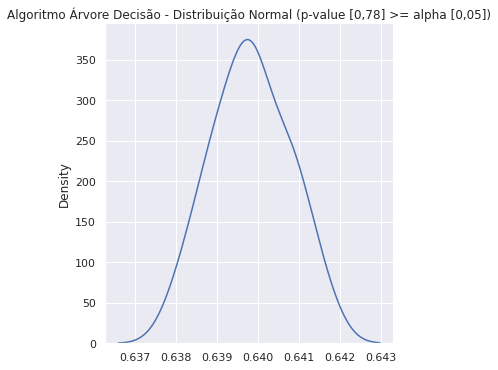

In [ ]:
sns.displot(resultados_arvore, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo Árvore Decisão - Distribuição Normal (p-value [0,78] >= alpha [0,05])', fontsize =12);

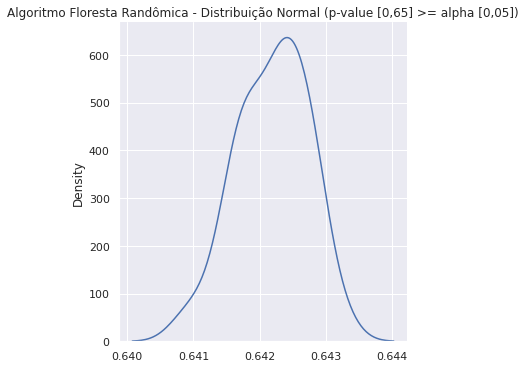

In [ ]:
sns.displot(resultados_random_forest, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo Floresta Randômica - Distribuição Normal (p-value [0,65] >= alpha [0,05])', fontsize =12);

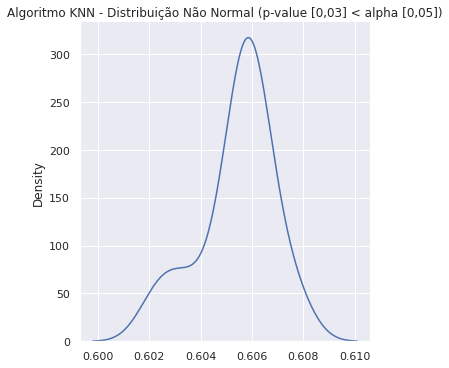

In [ ]:
sns.displot(resultados_knn, kind='kde'); # Não é DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo KNN - Distribuição Não Normal (p-value [0,03] < alpha [0,05])', fontsize =12);

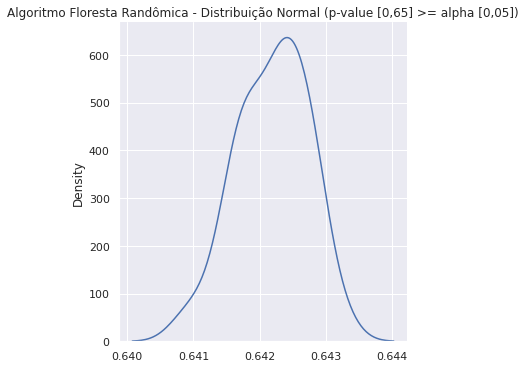

In [ ]:
sns.displot(resultados_random_forest, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo Floresta Randômica - Distribuição Normal (p-value [0,65] >= alpha [0,05])', fontsize =12);

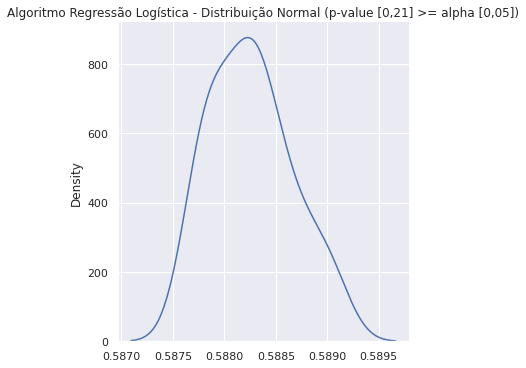

In [ ]:
sns.displot(resultados_logistica, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo Regressão Logística - Distribuição Normal (p-value [0,21] >= alpha [0,05])', fontsize =12);

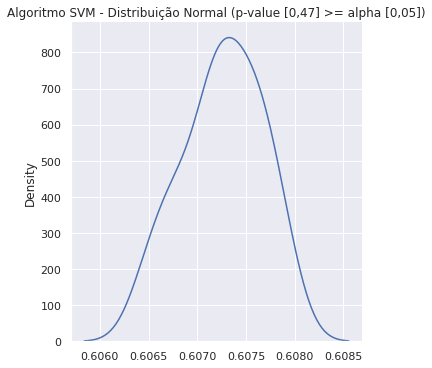

In [ ]:
sns.displot(resultados_svm, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo SVM - Distribuição Normal (p-value [0,47] >= alpha [0,05])', fontsize =12);

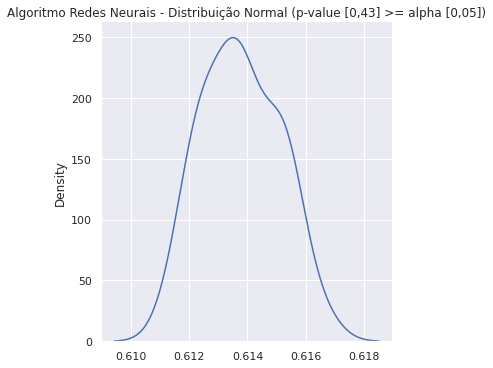

In [ ]:
sns.displot(resultados_redes_neurais, kind='kde'); # É DISTRIBUIÇÃO NORMAL
plt.title('Algoritmo Redes Neurais - Distribuição Normal (p-value [0,43] >= alpha [0,05])', fontsize =12);

##3.4 - Teste Hipótese ANOVA & Tukey

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn,resultados_logistica, resultados_knn,resultados_redes_neurais)
p

1.679631151548109e-216

In [ ]:
'''
Se a hipótese alternativa for rejeitada (resultados iguais), então não fará diferença em utilizar algoritmos de NEURAL NETWORK ou RANDOM TREE por exemplo.
Caso a hipótese nula for rejeitada, então deveremos saber qual o melhor algoritmo.
'''

alpha = 0.05 # Confiança do teste é de 95%
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes') # Existe diferenças de resultados estatísticos entre os algoritmos
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais') # Não existe diferença de resultados entre os algoritmos

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm,resultados_redes_neurais]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
#resultados_df.to_csv('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/AVALIACAO_ML/resultados_algoritmos.csv', index=False, header=True)
resultados_df

accuracy    algoritmo
0    0.638683       arvore
1    0.639064       arvore
2    0.638250       arvore
3    0.640743       arvore
4    0.639802       arvore
..        ...          ...
175  0.613606  rede_neural
176  0.615361  rede_neural
177  0.614140  rede_neural
178  0.612157  rede_neural
179  0.615641  rede_neural

[180 rows x 2 columns]

In [ ]:
'''
Comparação emtre grupos de algoritmos
[p-adj] = valor de P
[FWER]  = valor do ALPHA 

Resultado: [REJECT] é true, logo todos os algoritmos são diferentes
'''

compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0344 0.001 -0.0351 -0.0337   True
       arvore     logistica  -0.0516 0.001 -0.0523 -0.0509   True
       arvore random_forest   0.0024 0.001  0.0017  0.0031   True
       arvore   rede_neural  -0.0261 0.001 -0.0268 -0.0254   True
       arvore           svm  -0.0326 0.001 -0.0333 -0.0319   True
          knn     logistica  -0.0172 0.001 -0.0179 -0.0165   True
          knn random_forest   0.0368 0.001  0.0361  0.0375   True
          knn   rede_neural   0.0083 0.001  0.0076   0.009   True
          knn           svm   0.0018 0.001  0.0011  0.0025   True
    logistica random_forest   0.0539 0.001  0.0532  0.0546   True
    logistica   rede_neural   0.0255 0.001  0.0248  0.0262   True
    logistica           svm    0.019 0.001  0.0183  0.0197   True
random_for

In [ ]:
# O algoritmo RandomTree é estatisticamente superior ao DecisionTree 
resultados.mean()

DecisionTree          0.639827
RandomTree            0.642191
KNN                   0.605423
LogisticRegression    0.588261
SVM                   0.607262
NeuralNetwork         0.613770
dtype: float64

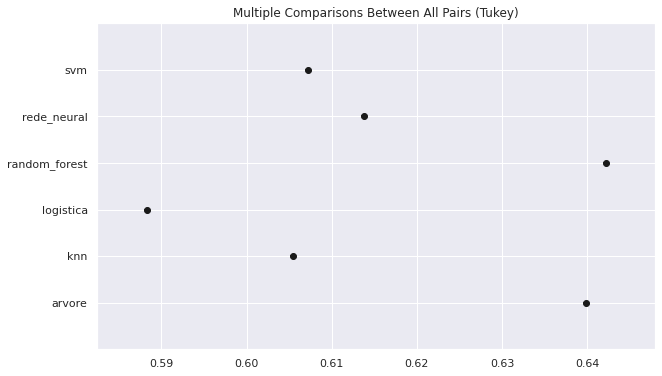

In [ ]:
teste_estatistico.plot_simultaneous();

#IV - Persistência dos classificadores treinados

##4.1 - Salvando um CLASSIFICADOR TREINADO

In [ ]:
classifier_random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 150)
classifier_random_forest.fit(X_srag, y_srag)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
classifier_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
classifier_tree.fit(X_srag, y_srag)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
classifier_neural_network = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
classifier_neural_network.fit(X_srag, y_srag)

Iteration 1, loss = 0.68806714
Iteration 2, loss = 0.66738494
Iteration 3, loss = 0.66495721
Iteration 4, loss = 0.66361947
Iteration 5, loss = 0.66256910
Iteration 6, loss = 0.66203510
Iteration 7, loss = 0.66139630
Iteration 8, loss = 0.66090244
Iteration 9, loss = 0.66050608
Iteration 10, loss = 0.65993799
Iteration 11, loss = 0.65957614
Iteration 12, loss = 0.65901352
Iteration 13, loss = 0.65880175
Iteration 14, loss = 0.65842865
Iteration 15, loss = 0.65816226
Iteration 16, loss = 0.65802086
Iteration 17, loss = 0.65743721
Iteration 18, loss = 0.65732077
Iteration 19, loss = 0.65696037
Iteration 20, loss = 0.65686493
Iteration 21, loss = 0.65621021
Iteration 22, loss = 0.65603696
Iteration 23, loss = 0.65567683
Iteration 24, loss = 0.65552796
Iteration 25, loss = 0.65533642
Iteration 26, loss = 0.65531709
Iteration 27, loss = 0.65451478
Iteration 28, loss = 0.65447490
Iteration 29, loss = 0.65418664
Iteration 30, loss = 0.65357420
Iteration 31, loss = 0.65384522
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
pickle.dump(classifier_random_forest, open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_random_forest.sav', 'wb'))
pickle.dump(classifier_tree, open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_tree.sav', 'wb'))
pickle.dump(classifier_neural_network, open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_neural_network.sav', 'wb'))

#V - Avaliação de Modelo (classificadores escolhidos)

In [ ]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
import scikitplot as skplt
classes = ["SIM","NAO"]

##5.1 - Relatório de Classificação

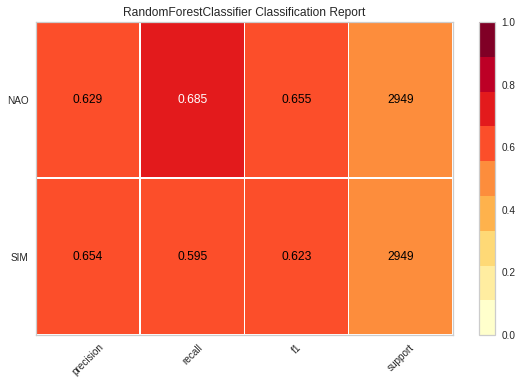

In [ ]:
visualizer = ClassificationReport(RandomForestClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof(); 

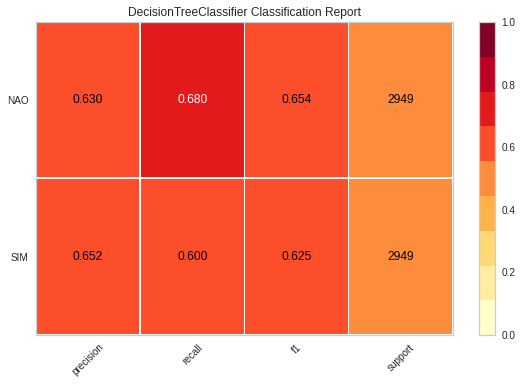

In [ ]:
visualizer = ClassificationReport(DecisionTreeClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof();
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/AVALIACAO_MACHINE_LEARNING/II - decision_tree.png',
    dpi=300,
    bbox_inches="tight"
);       

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


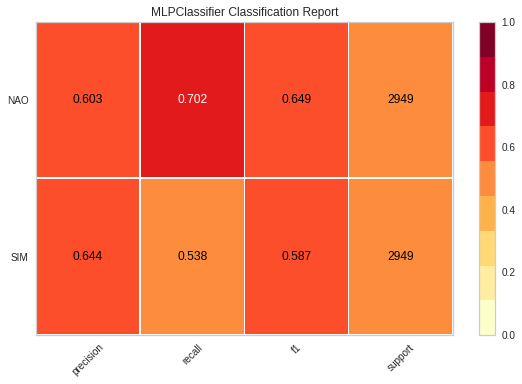

In [ ]:
visualizer = ClassificationReport(MLPClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof(); 
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/AVALIACAO_MACHINE_LEARNING/III -neural_network.png',
    dpi=300,
    bbox_inches="tight"
);   

##5.2 - ROC

A curva ROC ( Receiver Operating Characteristics curve ) é a exibição de sensibilidade e especificidade para diferentes valores de corte para probabilidade (Se a probabilidade de resposta positiva estiver acima do corte, prevemos um resultado positivo, caso contrário, estamos prevendo um negativo). Cada valor de corte define um ponto na curva ROC, variando o corte de 0 a 1 irá desenhar a curva ROC inteira. A <strong>curva azul no diagrama da curva ROC</strong> abaixo é o mesmo modelo que o exemplo para o gráfico de ganhos:

eixo X <strong>(specifity = TN/(TN + FP))</strong>: mede a TAXA DE PACIENTES PREVISTOS INCORRETAMENTE com a reposta <strong>NEGATIVA</strong>;</br>
eixo Y <strong>(sensitivity = TP/TP+FN)</strong>: mede a TAXA DOS PACIENTES PREVISTOS corretamente com a reposta <strong>POSITIVA</strong>;

###I - Random Forest

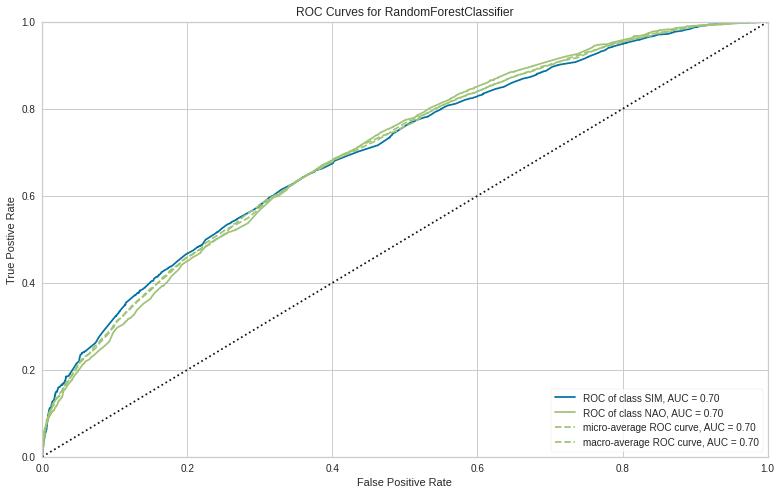

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
visualizer = ROCAUC(RandomForestClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof();

###II - Decision Tree

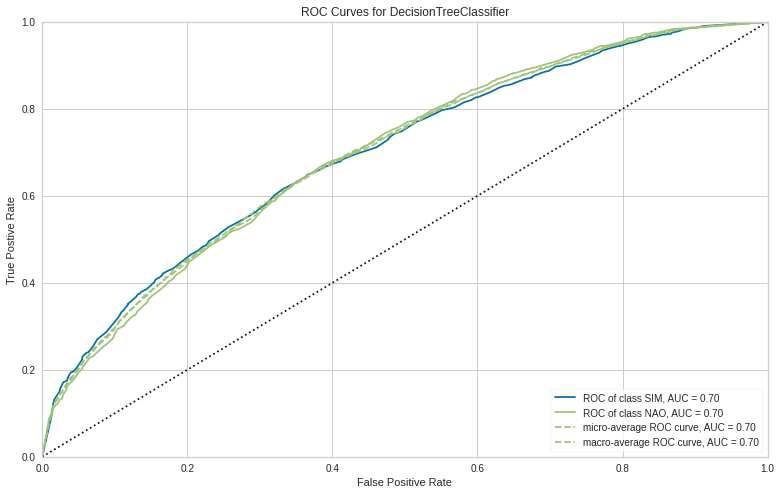

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
visualizer = ROCAUC(DecisionTreeClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof(); 
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/RESULTADO/IV - ROC/II - ROC - decision_tree.png',
    dpi=300,
    bbox_inches="tight"
);

###III - Neural Network

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


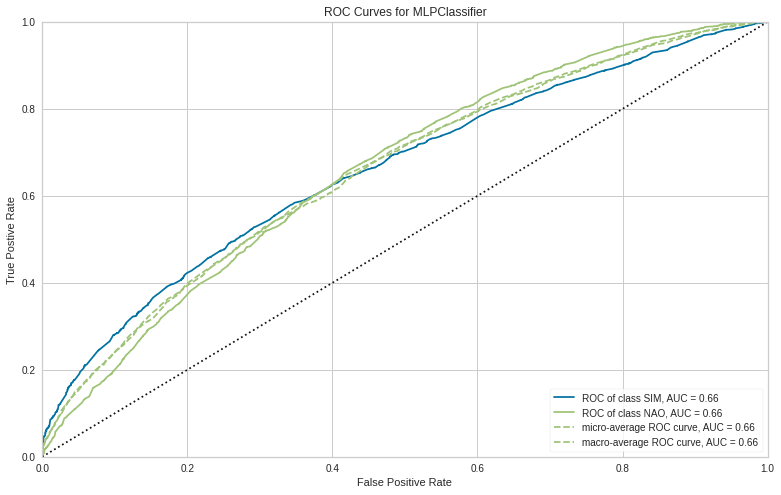

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
visualizer = ROCAUC(MLPClassifier(), classes=classes, support=True)
visualizer.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)        # Fit the visualizer and the model
visualizer.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
visualizer.poof(); 
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/RESULTADO/IV - ROC/III - ROC - neural_network.png',
    dpi=300,
    bbox_inches="tight"
);

##5.3 - Gráfico de Ganhos Cumulativos

Esse gráfico modela a <strong>taxa de VERDADEIROS POSITIVOS (sensitivity)</strong> em relação à <strong>taxa de SUPORTE (fração das predições positivas)</strong>.


<strong>Interpretação: </strong> </br>
Eixo X = é a porcentagem da base de pacientes com SRAG por COVID-19 </br>
Eixo Y = é a porcentagem de todos os pacientes com repostas positivas encontradas na amostra alvo. </br>
<a href="https://translate.google.com/translate?hl=pt-BR&sl=en&u=https://community.tibco.com/wiki/gains-vs-roc-curves-do-you-understand-difference&prev=search&pto=aue">Link tutorial</a>
</br>
<a href="https://community-tibco-com.translate.goog/wiki/gains-vs-roc-curves-do-you-understand-difference?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=ajax,sc,elem#toc-5">Comparação</a>

###I - Random Forest

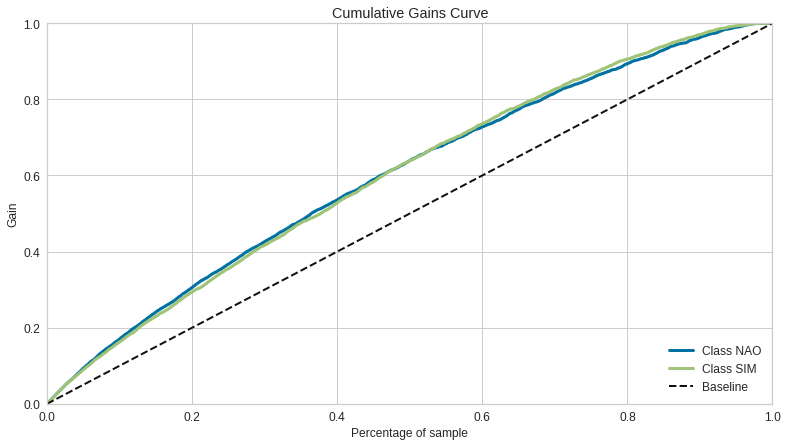

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 100)
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_cumulative_gain(y_srag_teste_balance, y_probas, ax=ax)
plt.show();

<strong>INTERPRETAÇÃO:</strong> De acordo com os resultados do modelo, se considerarmos os 50% (metade) dos pacientes com a maior probabilidade de INTERNAÇÃO EM UTI, obteremos 63% de todas as respostas positivas possíveis.

###II - Decision Tree

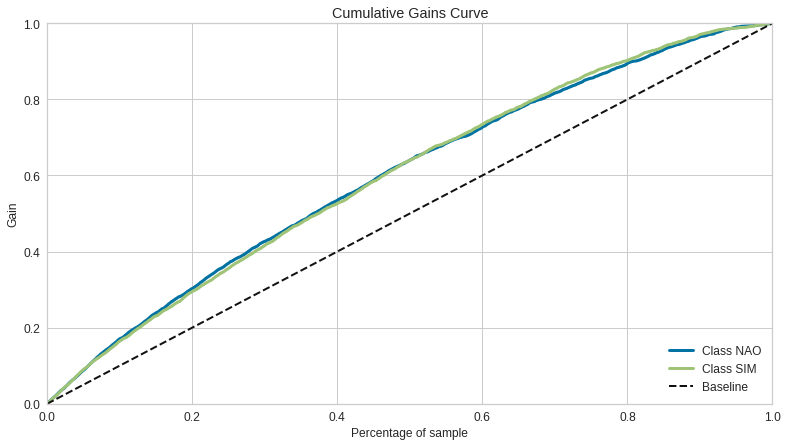

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = DecisionTreeClassifier()
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_cumulative_gain(y_srag_teste_balance, y_probas, ax=ax)
plt.show();

###III - Neural Network

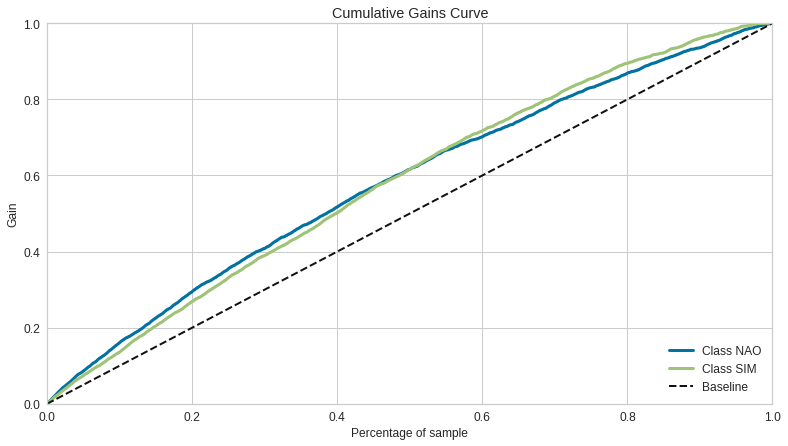

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = MLPClassifier()
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_cumulative_gain(y_srag_teste_balance, y_probas, ax=ax)
plt.show();

##5.4 - Gráfico de Elevação

Mostra o quão melhor é o nosso desempenho em relação ao modelo de base. Em outras palavras, mostra quantas vezes o modelo é melhor do que a escolha aleatória de casos.

<strong>Eixo Y (o ganho dividido pela porcentagem da amostra)</strong> = melhoria em comparação com escolher os internados de modo aleatório

###I - Random Forest

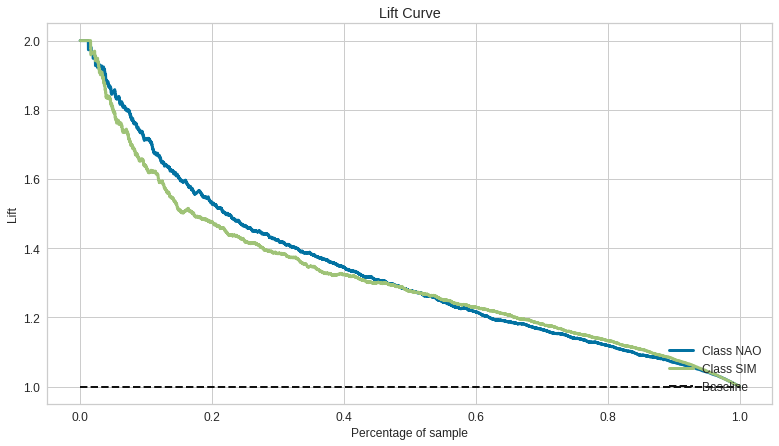

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 100)
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_lift_curve(y_srag_teste_balance, y_probas, ax=ax)
plt.show();

<strong>INTERPRETAÇÃO</strong>:Se ordenássemos os pacientes com SRAG de acordo com a probabilidade de internação e considerássemos os primeiros 50%, nossa elevação (lift) seria de aproximadamente 1,3 vezes (ganho dividido pela porcentagem da amostra) de melhoria em comparação com escolher os internados de modo aleatório. (Teríamos 1,3 vezes mais internados)

###II - Decision Tree

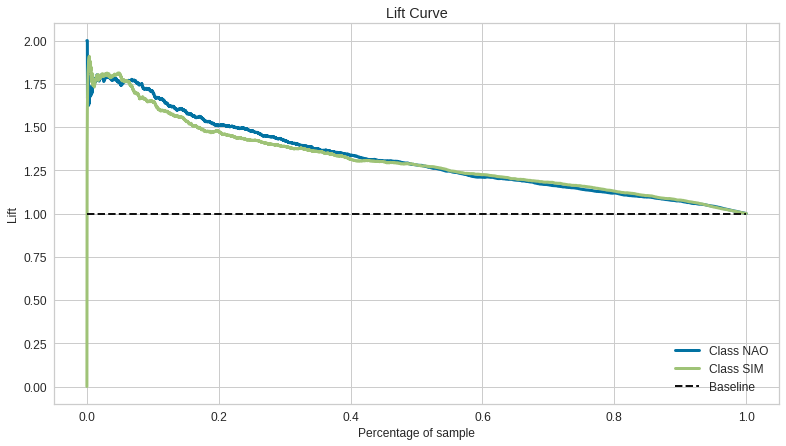

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = DecisionTreeClassifier()
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_lift_curve(y_srag_teste_balance, y_probas, ax=ax)

fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/II - lift_curve - decision_tree.png',
    dpi=300,
    bbox_inches="tight"
)

plt.show();

###III - Neural Network

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


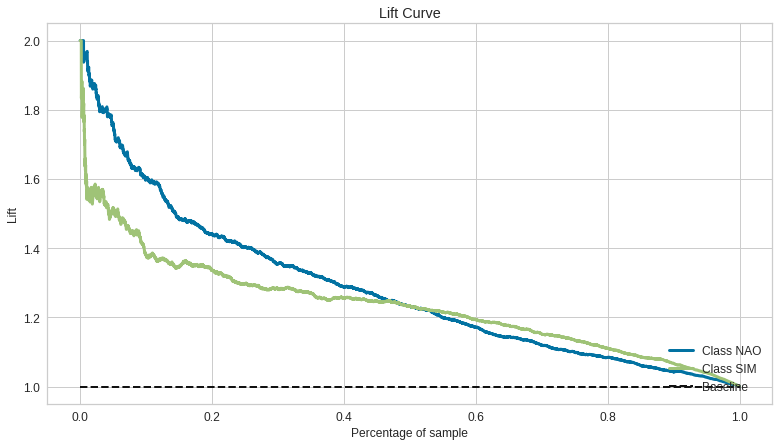

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
model = MLPClassifier()
model = model.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
y_probas = model.predict_proba(X_srag_teste_balance)
skplt.metrics.plot_lift_curve(y_srag_teste_balance, y_probas, ax=ax)

fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/III - lift_curve - neural_network.png',
    dpi=300,
    bbox_inches="tight"
)

plt.show();

##5.5 - Erro de predição de classe

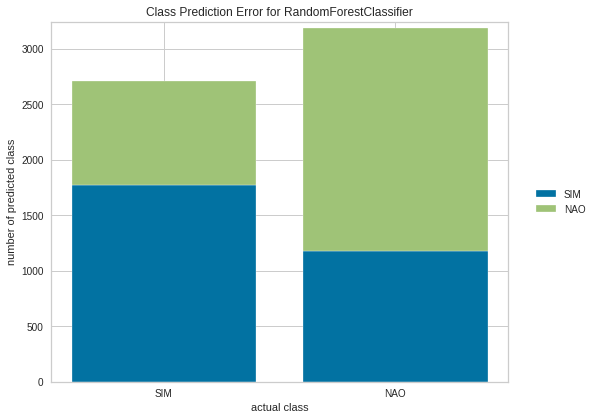

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
erro = ClassPredictionError(RandomForestClassifier(), classes=classes)
erro.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
erro.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
erro.poof();

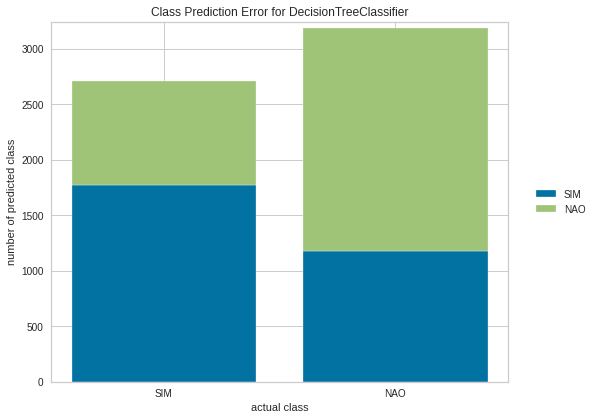

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
erro = ClassPredictionError(DecisionTreeClassifier(), classes=classes)
erro.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
erro.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
erro.poof(); 
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/RESULTADO/III - ERRO/II - erro_predict - decision_tre.png',
    dpi=300,
    bbox_inches="tight"
);

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


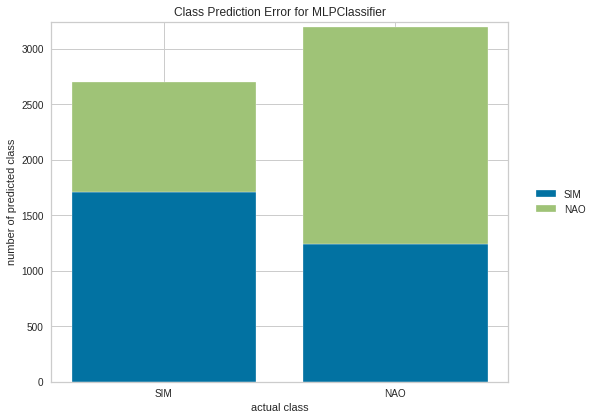

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
erro = ClassPredictionError(MLPClassifier(), classes=classes)
erro.fit(X_srag_treinamento_balance, y_srag_treinamento_balance)
erro.score(X_srag_teste_balance, y_srag_teste_balance)        # Evaluate the model on the test data
erro.poof(); 
fig.savefig(
    '/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/IMAGE/RESULTADO/III - ERRO/III - erro_predict - neural_network.png',
    dpi=300,
    bbox_inches="tight"
);

#VI - Modelo Gerado

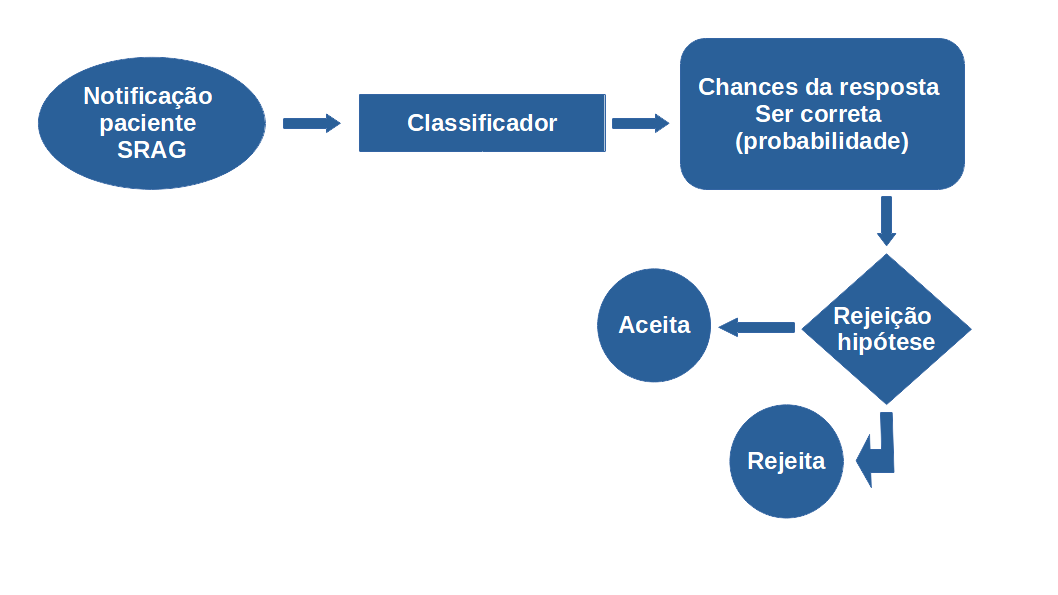

<p>O modelo gerado agrega os classificadores Machine Learning que tiveram o melhor desempenho na etapa de Avaliação dos algoritmos</p>
</br>
Ele se basei em uma técnica de votação entre os classificadores através da hipótese da resposta obtida ser a correta.

In [ ]:
with open('/content/drive/MyDrive/TCC - PUC MG/DATASET/DATASET_AM/srag_train_test_balance.pkl','rb') as f:
	X_srag_treinamento_balance, X_srag_teste_balance, y_srag_treinamento_balance, y_srag_teste_balance = pickle.load(f)
 
X_srag = np.concatenate((X_srag_treinamento_balance, X_srag_teste_balance), axis = 0) # Concatena os previsores por linha
y_srag = np.concatenate((y_srag_treinamento_balance, y_srag_teste_balance), axis = 0) # Concatena as classes por linha

random_forest = pickle.load(open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_random_forest.sav','rb'))
decision_tree = pickle.load(open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_tree.sav','rb'))
neural_network = pickle.load(open('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/classifier_neural_network.sav','rb'))

In [ ]:
# Função que insere registros em Dataframe
def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [ ]:
results_classifier = pd.DataFrame(columns=['RESULTADO']) # Declara DATAFRAME

for record in X_srag.tolist(): 
    # Novo registro de SRAG por COVID-19
    value = record
    novo_registro = np.asarray(value, dtype=np.float32)
    
    # Algoritmos predizem retornando o RÓTULO de INTERNADO EM UTI
    reposta_random_forest = random_forest.predict(novo_registro.reshape(1, -1)) 
    reposta_decision_tree = decision_tree.predict(novo_registro.reshape(1, -1))
    reposta_neural_network = neural_network.predict(novo_registro.reshape(1, -1))

    # Algoritmos predizem retornando a CONFIANÇA DE ACERTO DO ALGORITMO CLASSIFICADOR
    probabilidade_random_forest = random_forest.predict_proba(novo_registro.reshape(1, -1)) 
    confianca_random_forest = probabilidade_random_forest.max()

    probabilidade_decision_tree = decision_tree.predict_proba(novo_registro.reshape(1, -1))
    confianca_decision_tree = probabilidade_decision_tree.max()

    probabilidade_neural_network = neural_network.predict_proba(novo_registro.reshape(1, -1))
    confianca_neural_network = probabilidade_neural_network.max()

    interna = 0               # Armazenará a quantidade de pacientes INTERNADOS
    nao_interna = 0           # Armazenará a quantidade de pacientes NÃO INTERNADOS
    confianca_minima = 0.7    # Confiança mínima de Acerto do Algoritmo
    algoritmos = 0            # Quantidade de classificadores que acertaram as previsões

    if confianca_random_forest >= confianca_minima: # Classificador FLORESTA RANDÔMICA
      algoritmos += 1
      if reposta_random_forest[0] == 'NAO':
        nao_interna += 1
      else:
        interna += 1

    if confianca_decision_tree >= confianca_minima: # Classificador ÁRVORE DE DECISÃO
      algoritmos += 1
      if reposta_decision_tree[0] == 'NAO':
        nao_interna += 1
      else:
        interna += 1

    if confianca_neural_network >= confianca_minima: # Classificador REDE NEURAL
      algoritmos += 1
      if reposta_neural_network[0] == 'NAO':
        nao_interna += 1
      else:
        interna += 1

    if interna > nao_interna:
      value = 'Paciente com COVID-19 INTERNARÁ, baseado em {} algoritmos'.format(algoritmos)
      insert(results_classifier, pd.Series({'RESULTADO': value}, name=0))
    elif interna == nao_interna:
      value = 'Empate, baseado em {} algoritmos'.format(algoritmos)
      insert(results_classifier, pd.Series({'RESULTADO': value}, name=0))
    else:
      value = 'Paciente com COVID-19 NÃO INTERNARÁ, baseado em {} algoritmos'.format(algoritmos)
      insert(results_classifier, pd.Series({'RESULTADO': value}, name=0)) 

In [ ]:
#results_classifier.to_csv('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/results_classifier.csv', index=False, header=True)
data = pd.read_csv('/content/drive/MyDrive/TCC PUC MINAS - MOISES FELIPE DOS SANTOS/DATASET/III - CLASSIFICADOR_TREINADO/results_classifier.csv')

hipoteses_modelo = data.groupby('RESULTADO').size().reset_index(name='counts')
pd.set_option('max_colwidth', 800)
hipoteses_modelo

RESULTADO  counts
0                               Empate, baseado em 0 algoritmos   27729
1                               Empate, baseado em 2 algoritmos     200
2      Paciente com COVID-19 INTERNARÁ, baseado em 1 algoritmos    1924
3      Paciente com COVID-19 INTERNARÁ, baseado em 2 algoritmos    1477
4      Paciente com COVID-19 INTERNARÁ, baseado em 3 algoritmos    1715
5  Paciente com COVID-19 NÃO INTERNARÁ, baseado em 1 algoritmos    2010
6  Paciente com COVID-19 NÃO INTERNARÁ, baseado em 2 algoritmos    1164
7  Paciente com COVID-19 NÃO INTERNARÁ, baseado em 3 algoritmos    3101